In [1]:
from hpelm import ELM
import numpy as np
import time
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from PIL import Image
# from numpy import array
# from scipy.misc import imresize

In [3]:
# from os import listdir
# from os.path import isfile, join
# from cutImages import cut_image


# def read_images(path):
#     fullList = []
#     for c in range(1, 100):
#         mypath = path + str(c) + "/"
#         onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#         print (len(onlyfiles), c)
#         for x in onlyfiles:
#             if x == 'bb_info.txt':
#                 continue
#             img = cut_image(mypath + x)
#             arr = array(img)
#             arr = imresize(arr, [32, 32, 3])
#             r = arr[:, :, 0].flatten()
#             g = arr[:, :, 1].flatten()
#             b = arr[:, :, 2].flatten()
#             label = [c]
#             out = np.array(list(label) + list(r) + list(g) + list(b), np.int)
#             fullList.append(out)
#     shuffle(fullList)
#     imagesList = np.array(fullList, dtype=int)
#     print ("images shape: {}".format(imagesList.shape))
#     return imagesList

In [2]:
# imagesList = np.load('UECFOOD_100_1000Features_train.npy')
trainingData = np.loadtxt('/media/aymen/DATA/datasets/cropped_db/UECFOOD100-Cropped//1664features-cnn-aug-crop-27epoch-food101.svm')
# trainingData = np.loadtxt(
#     '/media/aymen/DATA/datasets/food101/train/1664features-cnn-aug-nc-100epoch-finetuned-food101.svm')
# testingData = np.loadtxt(
#     '/media/aymen/DATA/datasets/food101/test/1664features-cnn-aug-nc-100epoch-finetuned-food101.svm')

In [3]:
# trainingData.shape, testingData.shape
trainingData.shape

(14358, 1665)

from cPickle import load
all_features_file = '/media/aymen/DATA/datasets/ghalib-features/data_features_orb_UECFOOD100.pickle'
all_features = load(open(all_features_file, 'rb'))

img_class = all_features[0][0].split('/')[-2]
print(img_class)

fet = all_features[0][1]
print fet.shape

count = 0 
for i, val in all_features:
    if count < 3 :
        img_class = i.split('/')[-2]
        print img_class, val
        count +=1
    else:
        break
        

In [27]:
imagesList = shuffle(trainingData)
# index = np.argwhere(imagesList== 175.0)
# imagesList = np.delete(imagesList, index,axis=0)
precentage = 0.77
print ('imaglist full', imagesList.shape)
trainImagesList = imagesList[0:int(imagesList.__len__() * precentage), :]
testImagesList = imagesList[int(imagesList.__len__() * precentage):, :]
print ('trainImagesList', trainImagesList.shape)
print ('testImagesList', testImagesList.shape)
print (trainImagesList.shape[0] + testImagesList.shape[0])
print(imagesList[3])
print(np.unique(imagesList[:,0]))

('imaglist full', (14358, 1665))
('trainImagesList', (11055, 1665))
('testImagesList', (3303, 1665))
14358
[  6.20000000e+01   3.47700000e-03   0.00000000e+00 ...,   1.27051600e+00
   1.10214700e+00   3.34815800e+00]
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.
  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.
  90.  91.  92.  93.  94.  95.  96.  97.  98.  99.]


In [5]:
# trainImagesList = trainingData
# testImagesList = testingData
# print(np.unique(trainImagesList[:,0]))
# print(np.unique(testImagesList[:,0]))

[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.
   72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.
   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.
   96.   97.   98.   99.  100.]
[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
   60.   61.   62. 

In [5]:
from collections import Counter
Counter(trainImagesList[:,0]),Counter(testImagesList[:,0])

(Counter({0.0: 486,
          1.0: 106,
          2.0: 76,
          3.0: 83,
          4.0: 172,
          5.0: 89,
          6.0: 78,
          7.0: 74,
          8.0: 121,
          9.0: 178,
          10.0: 103,
          11.0: 116,
          12.0: 100,
          13.0: 122,
          14.0: 87,
          15.0: 126,
          16.0: 253,
          17.0: 104,
          18.0: 83,
          19.0: 104,
          20.0: 119,
          21.0: 109,
          22.0: 103,
          23.0: 91,
          24.0: 90,
          25.0: 92,
          26.0: 102,
          27.0: 72,
          28.0: 82,
          29.0: 88,
          30.0: 558,
          31.0: 93,
          32.0: 82,
          33.0: 85,
          34.0: 89,
          35.0: 82,
          36.0: 88,
          37.0: 129,
          38.0: 84,
          39.0: 88,
          40.0: 94,
          41.0: 90,
          42.0: 86,
          43.0: 94,
          44.0: 139,
          45.0: 108,
          46.0: 104,
          47.0: 73,
          48.0: 77,
        

Counter({0.0: 620,
         1.0: 136,
         2.0: 104,
         3.0: 112,
         4.0: 218,
         5.0: 120,
         6.0: 107,
         7.0: 100,
         8.0: 148,
         9.0: 233,
         10.0: 134,
         11.0: 163,
         12.0: 130,
         13.0: 152,
         14.0: 106,
         15.0: 163,
         16.0: 353,
         17.0: 139,
         18.0: 112,
         19.0: 131,
         20.0: 151,
         21.0: 137,
         22.0: 134,
         23.0: 115,
         24.0: 115,
         25.0: 120,
         26.0: 126,
         27.0: 101,
         28.0: 102,
         29.0: 115,
         30.0: 728,
         31.0: 113,
         32.0: 118,
         33.0: 112,
         34.0: 121,
         35.0: 107,
         36.0: 113,
         37.0: 167,
         38.0: 106,
         39.0: 105,
         40.0: 121,
         41.0: 116,
         42.0: 104,
         43.0: 124,
         44.0: 181,
         45.0: 150,
         46.0: 122,
         47.0: 105,
         48.0: 102,
         49.0: 108,
         50.0: 118,
         51.0: 154,
         52.0: 140,
         53.0: 102,
         54.0: 109,
         55.0: 116,
         56.0: 246,
         57.0: 135,
         58.0: 108,
         59.0: 110,
         60.0: 117,
         61.0: 120,
         62.0: 111,
         63.0: 107,
         64.0: 131,
         65.0: 224,
         66.0: 147,
         67.0: 153,
         68.0: 157,
         69.0: 109,
         70.0: 117,
         71.0: 107,
         72.0: 109,
         73.0: 105,
         74.0: 147,
         75.0: 111,
         76.0: 122,
         77.0: 118,
         78.0: 100,
         79.0: 110,
         80.0: 115,
         81.0: 126,
         82.0: 142,
         83.0: 125,
         84.0: 115,
         85.0: 128,
         86.0: 342,
         87.0: 109,
         88.0: 115,
         89.0: 169,
         90.0: 117,
         91.0: 165,
         92.0: 167,
         93.0: 111,
         94.0: 108,
         95.0: 105,
         96.0: 126,
         97.0: 102,
         98.0: 153,
         99.0: 138})

In [ ]:
# images_norm = imagesList[:,1:]
# labels = imagesList[:,0]
# from sklearn.preprocessing import normalize
# images_norm = normalize(images_norm)

# print (images_norm.shape)
# print('labels',labels.shape)
# print(images_norm[324])
# print(np.unique(images_norm))
# trainImagesList = images_norm[0:int(images_norm.__len__() * .8), :]
# testImagesList = images_norm[int(images_norm.__len__() * .8):, :]

# trainImagesList_labels = labels[0:int(labels.__len__() * .8)]
# testImagesList_labels = labels[int(labels.__len__() * .8):]

# print ('trainImagesList', trainImagesList.shape)
# print ('testImagesList', testImagesList.shape)
# print ('trainImagesList_labels', trainImagesList_labels.shape)
# print ('testImagesList_labels', testImagesList_labels.shape)
# # images = norm2


In [28]:
epoch = 1
batch_size = trainImagesList.__len__() / epoch
hidden_num = 2500
_inputs = 1664
_outputs = 100
elm = ELM(_inputs, _outputs, batch=batch_size)
elm.add_neurons(hidden_num, "tanh")
print("batch_size : {}".format(batch_size))
print("hidden_num : {}".format(hidden_num))


batch_size : 11055
hidden_num : 2500


In [29]:
k=1
old_batch_size_k = 0
data = trainImagesList
start_time = time.time()
while k <= epoch:
    # shuffle(trainImagesList)
    print("batch : {}".format(k))
    # print (data.shape, data.dtype)
    # dynamic
#     train_x = np.array(data[old_batch_size_k:(batch_size * k), 1:], dtype="float")
#     train_y = np.array(data[old_batch_size_k:(batch_size * k), 0], dtype="int")
#     if k == epoch:
#         train_x = np.array(data[old_batch_size_k:, 1:], dtype="float")
#         train_y = np.array(data[old_batch_size_k:, 0], dtype="int")
#     old_batch_size_k = batch_size * k

#     # whole
#     train_x = np.array(data[:, 1:], dtype="float")
    train_y = np.array(data[:, 0], dtype="int")
    #separate labels and images 
#     train_x = np.array(trainImagesList, dtype="float")
#     train_y = np.array(trainImagesList_labels, dtype="int")
    
#     print ("X", train_x.shape)
#     print ("Y", train_y.shape)
    # end whole
    train_y = np.eye(np.max(train_y) + 1)[train_y]
    elm.train(np.array(data[:, 1:], dtype="float"), train_y)
    k += 1

end_time = time.time()
print("%s seconds" % (end_time - start_time))

batch : 1
2.51234412193 seconds


In [30]:
def predict(_testImagesList):
    # testImagesList = np.load(testPath)
    testList = _testImagesList

    # print ('testImagesList', testList, testList.shape)
    test_x = np.array(testList[:, 1:], dtype="float")
    test_y = np.array(testList[:, 0], dtype="int")
    test_y = np.eye(np.max(test_y) + 1)[test_y]
    #
    Y = elm.predict(test_x)
    predict = []
    for y in Y:
        predict.append(y.argmax())

    gt = []
    for y in test_y:
        gt.append(y.argmax())

    save = []
    for _ in np.arange(0, len(gt)):
        k = True if gt[_] == predict[_] else False
        save.append(k)

    return save,gt,predict

In [31]:
def predict_n(_testImagesList,n=5):
    # testImagesList = np.load(testPath)
    testList = _testImagesList

    # print ('testImagesList', testList, testList.shape)
    test_x = np.array(testList[:, 1:], dtype="float")
    test_y = np.array(testList[:, 0], dtype="int")
    test_y = np.eye(np.max(test_y) + 1)[test_y]
    #
    Y = elm.predict(test_x)
    predict = []
    for y in Y:
        predict.append(np.argsort(y)[-n:])

    gt = []
    for y in test_y:
        gt.append(y.argmax())

    save = []
    for _ in np.arange(0, len(gt)):
        k = True if gt[_] in predict[_] else False
        save.append(k)

    return save,gt,predict

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

In [13]:
# def predict_labels(_testImagesList,_labels):
#     # testImagesList = np.load(testPath)
#     testList = _testImagesList
#     labels = _labels

#     # print ('testImagesList', testList, testList.shape)
#     test_x = np.array(testList, dtype="float")
#     test_y = np.array(labels, dtype="int")
#     test_y = np.eye(np.max(test_y) + 1)[test_y]
#     #
#     Y = elm.predict(test_x)
#     predict = []
#     for y in Y:
#         predict.append(y.argmax())

#     gt = []
#     for y in test_y:
#         gt.append(y.argmax())

#     save = []
#     for _ in np.arange(0, len(gt)):
#         k = True if gt[_] == predict[_] else False
#         save.append(k)

#     return save

In [32]:
test,gt,prd = predict(testImagesList)
print("test accuracy: {0}".format(np.mean(test)))
train,tgt,tprd = predict(trainImagesList)
print("train accuracy: {0}".format(np.mean(train)))

test accuracy: 0.750227066303
train accuracy: 0.983536861149


In [33]:
test,gt,prd = predict_n(testImagesList,5)
print("test accuracy: {0}".format(np.mean(test)))
train,tgt,tprd = predict_n(trainImagesList,5)
print("train accuracy: {0}".format(np.mean(train)))

test accuracy: 0.919467151075
train accuracy: 1.0


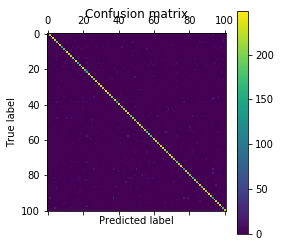

In [19]:

cnf_matrix = confusion_matrix(gt, prd, labels=list(range(101)))
# Plot non-normalized confusion matrix
plt.matshow(cnf_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('cnf_matrix.png',dpi = 300)

plt.show()


In [16]:
accuracy_score(gt,prd)

0.82851485148514847

Results : 

food101

test accuracy: 0.939603960396

train accuracy: 0.953267326733

UECFOOD256-Cropped

test accuracy: 0.632087492037

train accuracy: 0.930099208155

UECFOOD256

test accuracy: 0.558551863255

train accuracy: 0.89010738988


UECFOOD100

test accuracy: 0.74791086351

train accuracy: 0.984378109453

===========================

Aug 27 epoch - aug with crops 

UECFOOD100 - top5 

test accuracy: 0.918871866295

train accuracy: 1.0


UECFOOD100 - top1 

test accuracy: 0.750227066303

train accuracy: 0.983536861149

In [ ]:
# test = predict_labels(testImagesList,testImagesList_labels)
# print("test accuracy: {0}".format(np.mean(test)))
# train = predict_labels(trainImagesList,trainImagesList_labels)
# print("train accuracy: {0}".format(np.mean(train)))
# test accuracy: 0.90003960396
# train accuracy: 0.92598019802

test accuracy: 0.867333333333
train accuracy: 0.992444444444

In [ ]:
p = elm.predict(np.array(testImagesList[:, 1:], dtype="float"))

In [ ]:
arg_sort = lambda x:  np.argsort(x)[::-1]

In [ ]:
z.shape

In [ ]:
topk = 5
z = arg_sort(p)
# print(testImagesList[0, 0], z[0,:topk])
tru = 0
fal = 0
for i in range(len(testImagesList)):
    if testImagesList[i, 0] in z[i,:topk]:
        print(testImagesList[i, 0] , z[i,:topk])
        tru += 1
    else:
        fal += 1
float(tru/fal)
print(tru, fal)